## Author: Ahmed Taha
### Here You Can Find The Implementation of Knn Algorthim on Iris Data set 
### K-Nearest Neighbour(Knn) is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
### knn is classfication algorathtim is used to know at which class the new data is belongs 
### Knn Works on how similar the new data similar to it's saved data (Trained Data)
### In The knn we works to find the best value we can choose for K so K means the number of the neighbours we will take to perdict new point entered in data 
### Better Value for K shoud be odd value to can choose in which class the data will be belongs 
### One of The Important Things before training the knn algorthim is feature scalling since we find the nearest neighbour by get the distance of new data point to all the data points so we need our feature with same scale to prevent the one feature to be dominat on other one  


## Our steps in Implementation 
### -Spliting The data test and train
### -Data Pre-processing (Scalling the Features using sklearn)
### -Find the best score by try different value of k until found the best 
### -Re-Train the model using final k value 
### -Model Evalution 

# DataSet


### iris data set is data for flowers of differnt kinds and every kind are close to each other in some featuers like (SepalLengthCm,SepalWidthCm,PetalLengthCm ,PetalWidth)
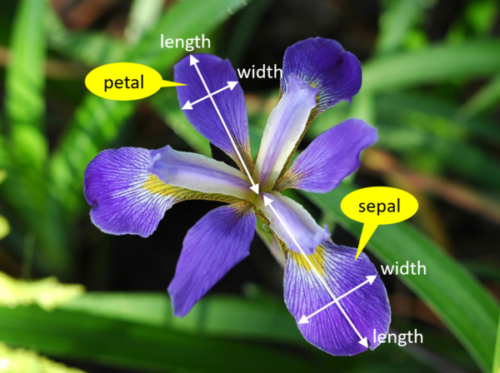

# Modules

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import seaborn as sns

In [22]:
iris=load_iris()

In [23]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [24]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


## Convert the data into pandas data frame to can manipulate the data

#### This line to concatenate the data of iris with target 
data=np.c_[iris['data'],iris['target']]

In [51]:
iris_dataframe=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']+['target_names'])
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## That's time to split the data Let's do it
###### note:  
###### iris_dataframe.iloc[:,:-1] means takes all the rows from the first colum (sepal length to petal width) this is our featuers
######  ris_dataframe.iloc[:,-1] means takes all the rows of the las colum only 

In [83]:
xtrain,xtest,ytrain,ytest=train_test_split(iris_dataframe.iloc[:,:-1],iris_dataframe.iloc[:,-1]
                                           ,test_size=0.2
                                           ,shuffle=True,random_state=0                                          
                                          )

## Print the shape of the data

In [84]:
print(f"xtrain shape is :{xtrain.shape}\nytrain shape is:{ytrain.shape}\nxtest shape is:{xtest.shape}\nytest shape is:{ytest.shape}")

xtrain shape is :(120, 4)
ytrain shape is:(120,)
xtest shape is:(30, 4)
ytest shape is:(30,)


## Visualize the data before the normlization 

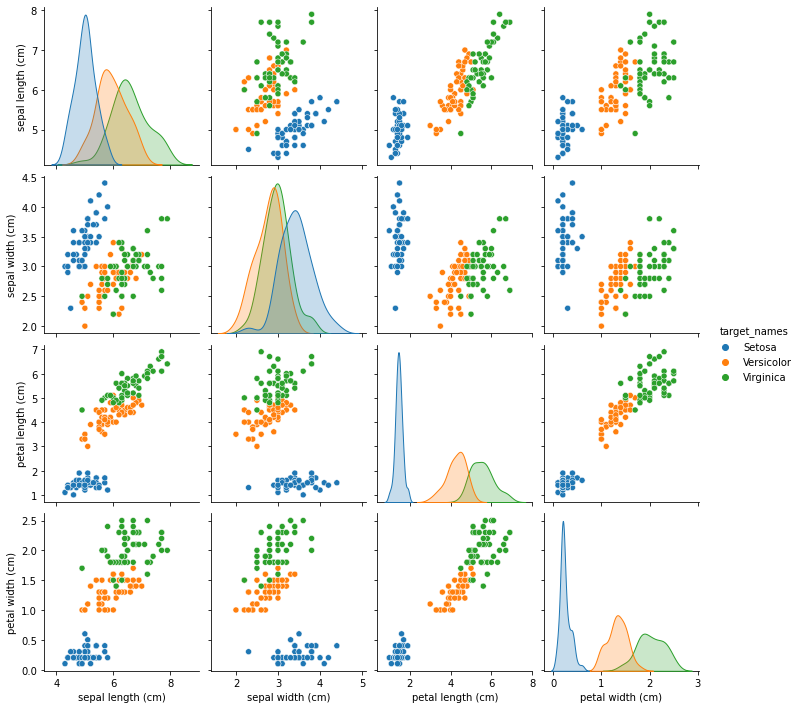

In [85]:
dic_targetcat= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'} 
data_befor_nor= sns.pairplot(iris_dataframe.replace({'target_names': dic_targetcat}), hue= 'target_names')

## Normlaizing the data

In [87]:
scaler= Normalizer().fit(xtrain) 
normalized_xtrain= scaler.transform(xtrain) 
normalized_xtest= scaler.transform(xtest) 

## Visualize the data after the normlization 

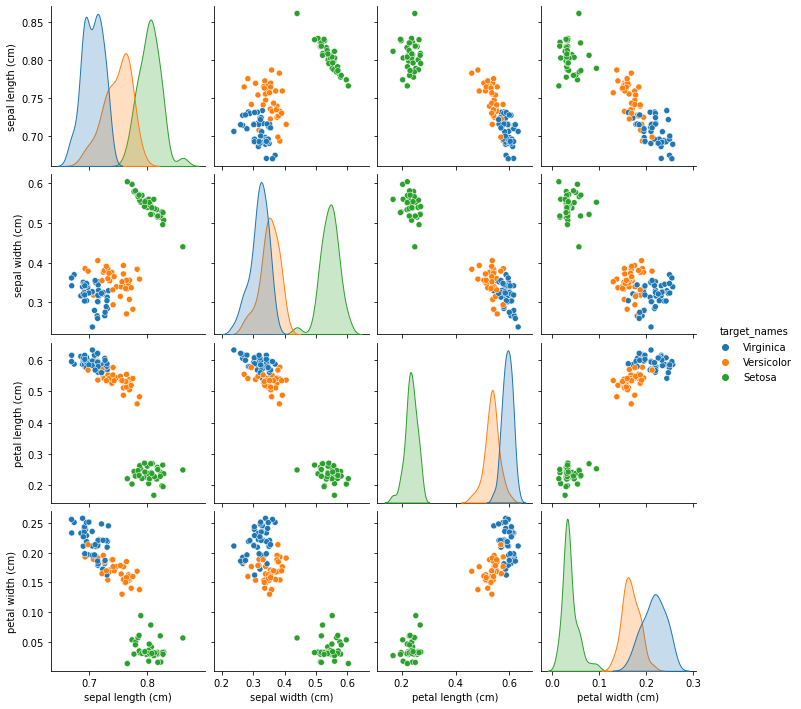

In [89]:
normlaized_dataframe=pd.DataFrame(data=np.c_[normalized_x_train,ytrain],columns=iris["feature_names"]+["target_names"])
dic_targetcat= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'} 
data_after_nor= sns.pairplot(normlaized_dataframe.replace({'target_names': dic_targetcat}), hue= 'target_names')

## Get the Score at different value of k

In [114]:
values_of_k=[]
values_of_Trainscore=[]
values_of_Testscore=[]
for i in range(3,10,2): # k should be odd number  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(normalized_xtrain,ytrain)    
    print(f" At the K={i} the scoreoftrain is={knn.score(normalized_xtrain,ytrain)}")
    print(f" At the K={i} the scoreoftest is={knn.score(normalized_xtest,ytest)}")



 At the K=3 the scoreoftrain is=0.9833333333333333
 At the K=3 the scoreoftest is=0.9666666666666667
 At the K=5 the scoreoftrain is=0.9666666666666667
 At the K=5 the scoreoftest is=1.0
 At the K=7 the scoreoftrain is=0.9666666666666667
 At the K=7 the scoreoftest is=0.9666666666666667
 At the K=9 the scoreoftrain is=0.9666666666666667
 At the K=9 the scoreoftest is=1.0


## Now will train the model at k=3

In [127]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(normalized_xtrain,ytrain) 

KNeighborsClassifier(n_neighbors=3)

## The score of our model is 

In [128]:
knn.score(normalized_xtest,ytest)

0.9666666666666667

## Plot Confusion Matrix

Text(42.0, 0.5, 'Truth')

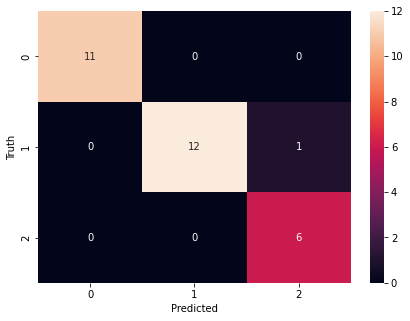

In [131]:
ypred = knn.predict(xtest)
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Show The Precision,recall,F1-Score of the model 

In [133]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      0.92      0.96        13
         2.0       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

